In [1]:
import pandas as pd

df = pd.read_csv('/Users/patwilliams/DSCI441/DSCI411-project/EDA/final_df.csv')

In [2]:
df.head()

,Year,Annual_%_Change_nasdaq,Annual_%_Change_dowj,Annual_%_Change_sp500,Annual_%_Change_gold,Annual_%_Change_silver,Annual_%_Change_crude,Annual_%_Change_copper,Annual_%_Change_corn,Annual_%_Change_cotton,Annual_%_Change_coffee,Annual_%_Change_sugar,Annual_%_Change_pound,Annual_%_Change_yen,Annual_%_Change_FFRate,Annual_%_Change_tenyrRate,Annual_%_Change_oneyrRate,Annual_Unemployment_Rate
0,2024.0,9.05,5.55,9.89,4.70,3.64,14.54,3.00,-6.53,13.58,-5.64,6.69,-0.51,6.85,0.00,10.05,4.59,3.800000
1,2023.0,43.42,13.70,24.23,13.08,-0.72,-11.40,1.89,-30.62,-2.41,17.43,2.19,5.22,7.56,23.09,0.00,1.27,3.625000
2,2022.0,-33.10,-8.78,-19.44,-0.23,2.64,7.05,-14.40,14.37,-26.29,-26.14,6.20,-10.52,13.91,6085.71,155.26,1112.82,3.633333
3,2021.0,21.39,18.73,26.89,-3.51,-11.55,55.01,26.83,22.57,44.14,76.30,21.89,-1.23,11.49,-22.22,63.44,290.00,5.341667
4,2020.0,43.64,7.25,16.26,24.43,47.44,-20.54,25.80,24.82,13.14,-1.12,15.42,3.21,-5.00,-94.19,-51.56,-93.71,8.091667


In [3]:
df.shape

(51, 18)

### Deal with Erraneous Outliers

In [4]:
def trim_outliers(data, column, threshold):
    mean = data[column].mean()
    std = data[column].std()
    # Determine lower and upper bounds for outliers
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    # Trim values beyond the lower and upper bounds
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Define the outlier thresholds for trimming
outlier_thresholds_trim = {
    'Annual_%_Change_silver': 2,
    'Annual_%_Change_sugar': 3,
    'Annual_%_Change_FFRate': 1,
    'Annual_%_Change_tenyrRate': 3,
    'Annual_%_Change_oneyrRate': 1
}

# Apply trimming to the specified columns
for column, threshold in outlier_thresholds_trim.items():
    df = trim_outliers(df, column, threshold)

In [5]:
# Display the DataFrame to check the changes
df.describe()  # Show the summary statistics after trimming the outliers

,Year,Annual_%_Change_nasdaq,Annual_%_Change_dowj,Annual_%_Change_sp500,Annual_%_Change_gold,Annual_%_Change_silver,Annual_%_Change_crude,Annual_%_Change_copper,Annual_%_Change_corn,Annual_%_Change_cotton,Annual_%_Change_coffee,Annual_%_Change_sugar,Annual_%_Change_pound,Annual_%_Change_yen,Annual_%_Change_FFRate,Annual_%_Change_tenyrRate,Annual_%_Change_oneyrRate,Annual_Unemployment_Rate
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1999.000000,13.743529,8.975294,9.530784,8.342157,6.592932,12.260784,7.564510,3.786471,4.092353,8.741569,8.893550,-0.528431,-0.515098,33.786446,2.411994,13.572964,6.142157
std,14.866069,25.469518,15.302718,16.728846,25.413344,32.175703,41.003989,34.332179,25.200004,28.917193,42.011427,45.654500,11.446110,11.781240,152.812065,29.422291,62.174580,1.679245
min,1974.000000,-40.540000,-33.840000,-38.490000,-32.150000,-51.860000,-53.530000,-53.700000,-39.560000,-58.480000,-50.080000,-69.490000,-26.260000,-23.400000,-95.420000,-51.560000,-93.710000,3.625000
25%,1986.500000,-0.215000,-1.420000,0.530000,-3.785000,-10.625000,-10.075000,-15.710000,-11.710000,-13.290000,-18.510000,-21.395000,-6.715000,-9.520000,-28.175000,-15.625000,-19.925000,4.908333
50%,1999.000000,15.400000,11.020000,12.400000,4.700000,2.640000,4.690000,3.000000,1.840000,3.690000,2.490000,4.960000,-0.510000,-0.890000,-4.250000,0.000000,0.550000,5.800000
75%,2011.500000,29.000000,20.295000,23.840000,19.185000,20.430000,28.455000,21.730000,14.920000,19.565000,24.850000,20.655000,6.955000,8.405000,51.475000,12.685000,29.525000,7.275000
max,2024.000000,85.590000,38.320000,34.110000,133.410000,143.399549,158.930000,137.580000,80.880000,91.550000,157.250000,175.921042,27.700000,23.670000,986.708758,104.051684,199.905587,9.708333


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

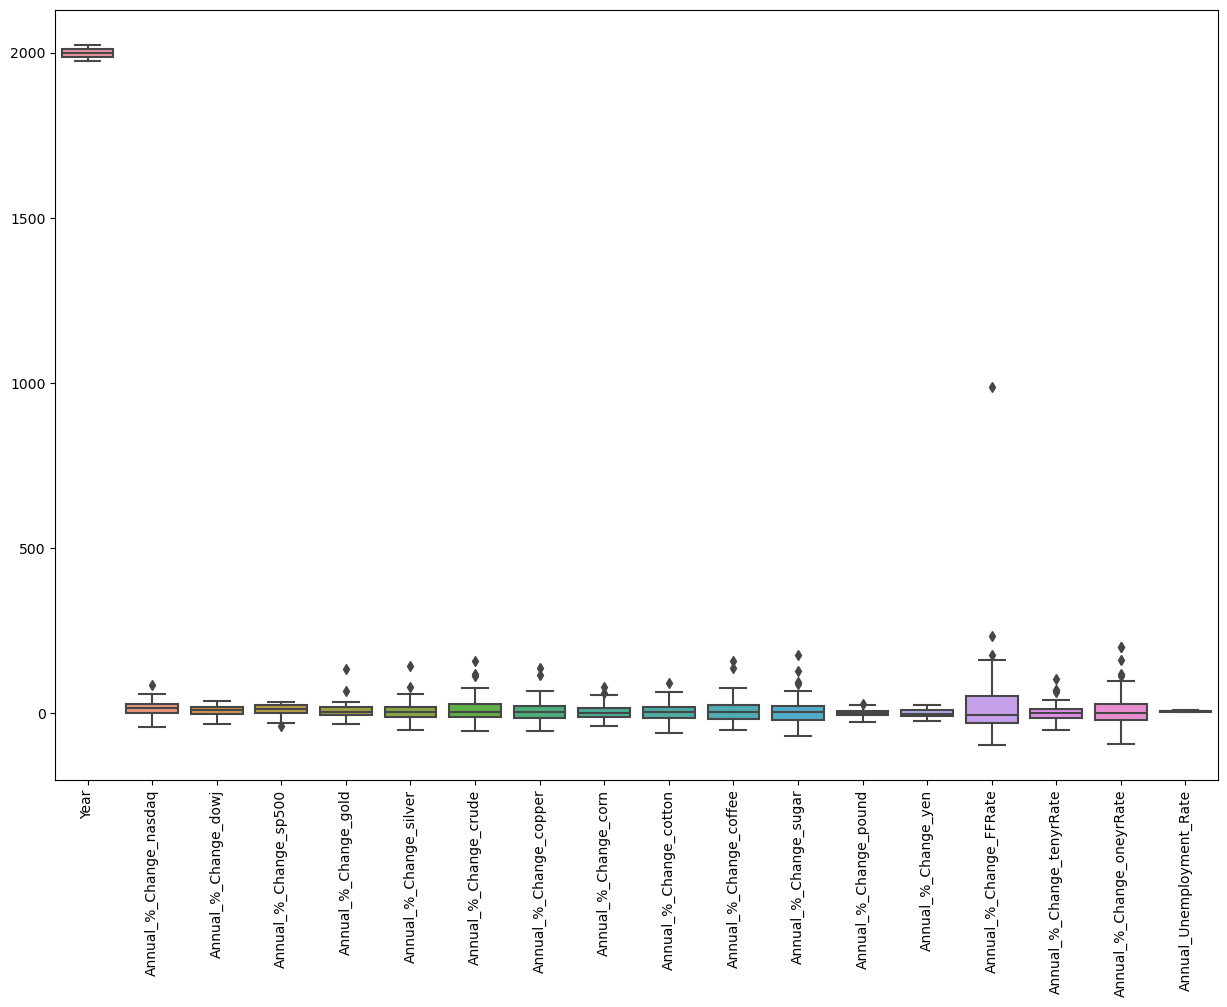

In [7]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels to make them readable
plt.show()

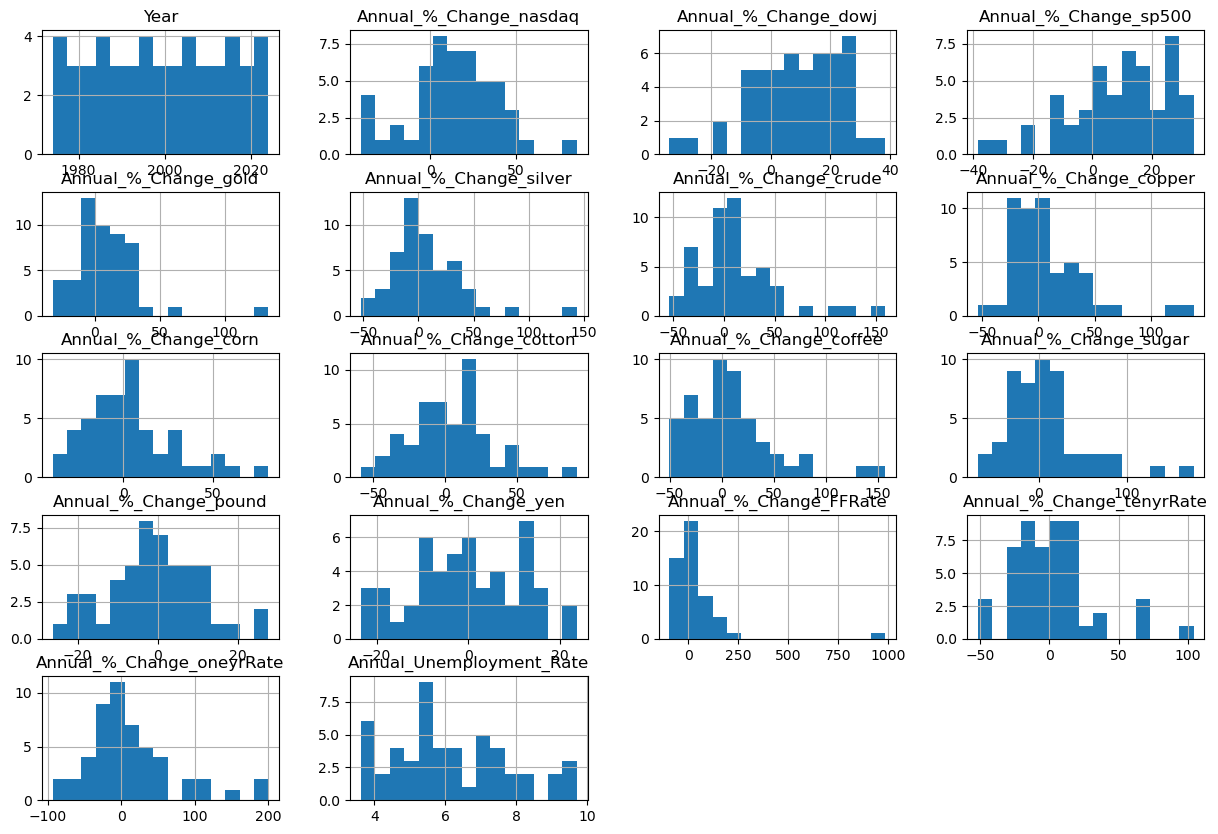

In [8]:
# Histograms
df.hist(bins=15, figsize=(15, 10))
plt.show()

#### Better, but still can do more to further normalize data

### Standardizing variables with wonky distributions using standard scaler

In [9]:
from sklearn.preprocessing import StandardScaler

# Define all the columns that you want to scale
columns_to_scale = [
    'Annual_%_Change_silver', 'Annual_%_Change_sugar', 'Annual_%_Change_FFRate', 
    'Annual_%_Change_tenyrRate', 'Annual_%_Change_oneyrRate', 'Annual_%_Change_gold', 
    'Annual_%_Change_crude', 'Annual_%_Change_copper', 'Annual_%_Change_coffee'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform
final_df_scaled = scaler.fit_transform(df[columns_to_scale])

# Create a DataFrame from the scaled columns
scaled_columns_df = pd.DataFrame(final_df_scaled, columns=columns_to_scale)

# Drop the original scale columns from the final_df
final_df = df.drop(columns_to_scale, axis=1)

# Concatenate the scaled columns with the remaining columns of the final_df
final_df = pd.concat([final_df.reset_index(drop=True), scaled_columns_df], axis=1)

# Show the first few rows of the DataFrame after scaling
final_df.head()


,Year,Annual_%_Change_nasdaq,Annual_%_Change_dowj,Annual_%_Change_sp500,Annual_%_Change_corn,Annual_%_Change_cotton,Annual_%_Change_pound,Annual_%_Change_yen,Annual_Unemployment_Rate,Annual_%_Change_silver,Annual_%_Change_sugar,Annual_%_Change_FFRate,Annual_%_Change_tenyrRate,Annual_%_Change_oneyrRate,Annual_%_Change_gold,Annual_%_Change_crude,Annual_%_Change_copper,Annual_%_Change_coffee
0,2024.0,9.05,5.55,9.89,-6.53,13.58,-0.51,6.85,3.800000,-0.092688,-0.048746,-0.223298,0.262182,-0.145917,-0.144743,0.056138,-0.134274,-0.345731
1,2023.0,43.42,13.70,24.23,-30.62,-2.41,5.22,7.56,3.625000,-0.229543,-0.148293,-0.070694,-0.082794,-0.199847,0.188286,-0.582778,-0.166927,0.208869
2,2022.0,-33.10,-8.78,-19.44,14.37,-26.29,-10.52,13.91,3.633333,-0.124077,-0.059586,6.297961,3.488887,3.026747,-0.340666,-0.128344,-0.646130,-0.838549
3,2021.0,21.39,18.73,26.89,22.57,44.14,-1.23,11.49,5.341667,-0.569481,0.287502,-0.370152,2.094849,3.026747,-0.471016,1.052936,0.566733,1.624098
4,2020.0,43.64,7.25,16.26,24.82,13.14,3.21,-5.00,8.091667,1.282133,0.144376,-0.845809,-1.852644,-1.742681,0.639346,-0.807901,0.536434,-0.237071


In [10]:
final_df.describe()

,Year,Annual_%_Change_nasdaq,Annual_%_Change_dowj,Annual_%_Change_sp500,Annual_%_Change_corn,Annual_%_Change_cotton,Annual_%_Change_pound,Annual_%_Change_yen,Annual_Unemployment_Rate,Annual_%_Change_silver,Annual_%_Change_sugar,Annual_%_Change_FFRate,Annual_%_Change_tenyrRate,Annual_%_Change_oneyrRate,Annual_%_Change_gold,Annual_%_Change_crude,Annual_%_Change_copper,Annual_%_Change_coffee
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,1999.000000,13.743529,8.975294,9.530784,3.786471,4.092353,-0.528431,-0.515098,6.142157,-6.530724e-18,0.000000,0.000000,-5.986497e-18,6.802837e-17,-2.612289e-17,1.741526e-17,-5.659961e-17,-3.374207e-17
std,14.866069,25.469518,15.302718,16.728846,25.200004,28.917193,11.446110,11.781240,1.679245,1.009950e+00,1.009950,1.009950,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00
min,1974.000000,-40.540000,-33.840000,-38.490000,-39.560000,-58.480000,-26.260000,-23.400000,3.625000,-1.834756e+00,-1.733969,-0.853939,-1.852644e+00,-1.742681e+00,-1.609197e+00,-1.620463e+00,-1.802219e+00,-1.414065e+00
25%,1986.500000,-0.215000,-1.420000,0.530000,-11.710000,-13.290000,-6.715000,-9.520000,4.908333,-5.404469e-01,-0.670031,-0.409510,-6.191384e-01,-5.441337e-01,-4.819448e-01,-5.501425e-01,-6.846668e-01,-6.551250e-01
50%,1999.000000,15.400000,11.020000,12.400000,1.840000,3.690000,-0.510000,-0.890000,5.800000,-1.240770e-01,-0.087016,-0.251387,-8.279418e-02,-2.115422e-01,-1.447428e-01,-1.864725e-01,-1.342743e-01,-1.502871e-01
75%,2011.500000,29.000000,20.295000,23.840000,14.920000,19.565000,6.955000,8.405000,7.275000,4.343263e-01,0.260182,0.116905,3.526315e-01,2.591214e-01,4.309049e-01,3.988723e-01,4.167065e-01,3.872451e-01
max,2024.000000,85.590000,38.320000,34.110000,80.880000,91.550000,27.700000,23.670000,9.708333,4.294169e+00,3.694915,6.297961,3.488887e+00,3.026747e+00,4.970315e+00,3.612542e+00,3.824669e+00,3.570128e+00


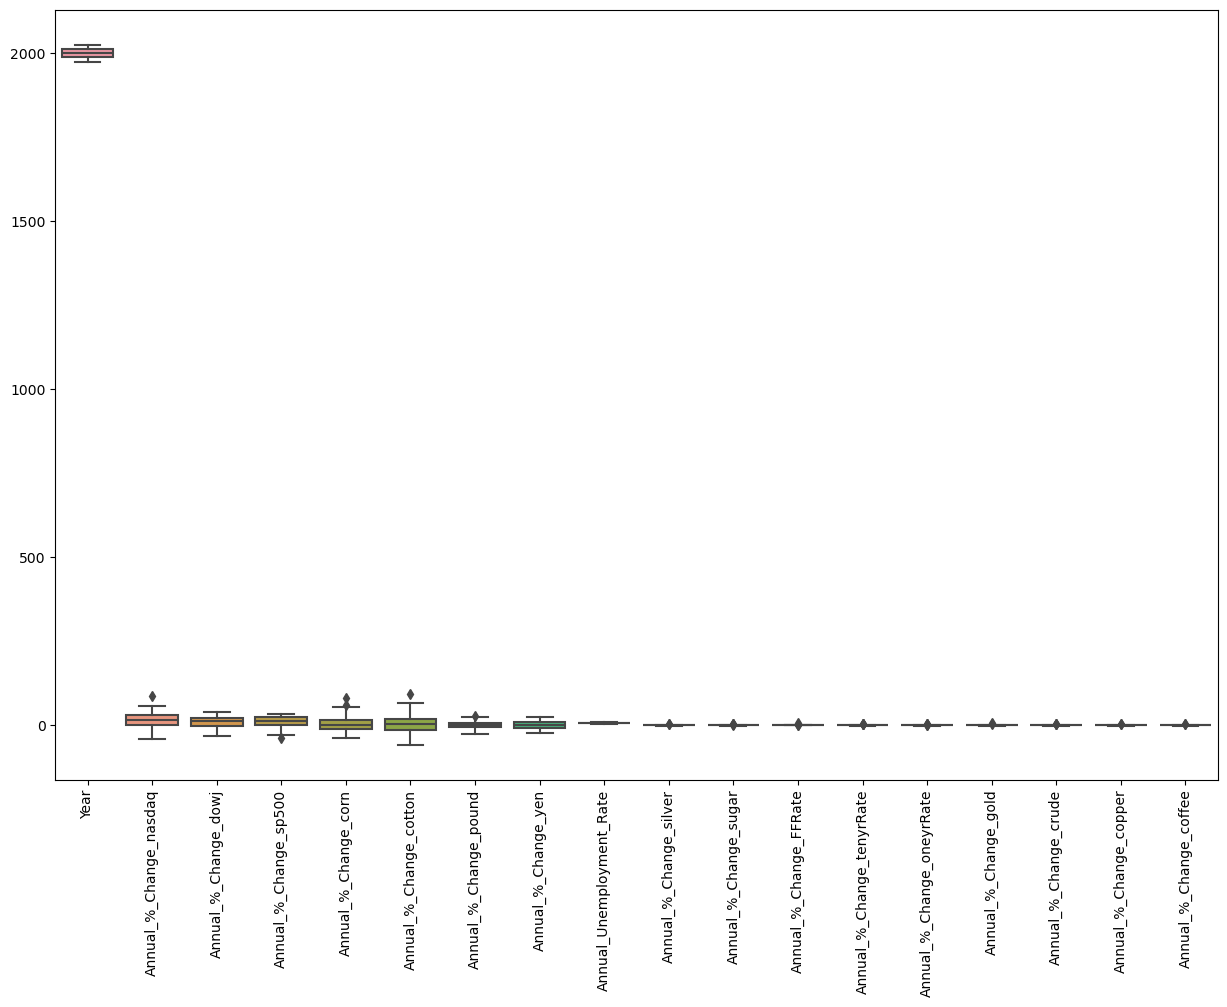

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=final_df)
plt.xticks(rotation=90)  # Rotate x-axis labels to make them readable
plt.show()

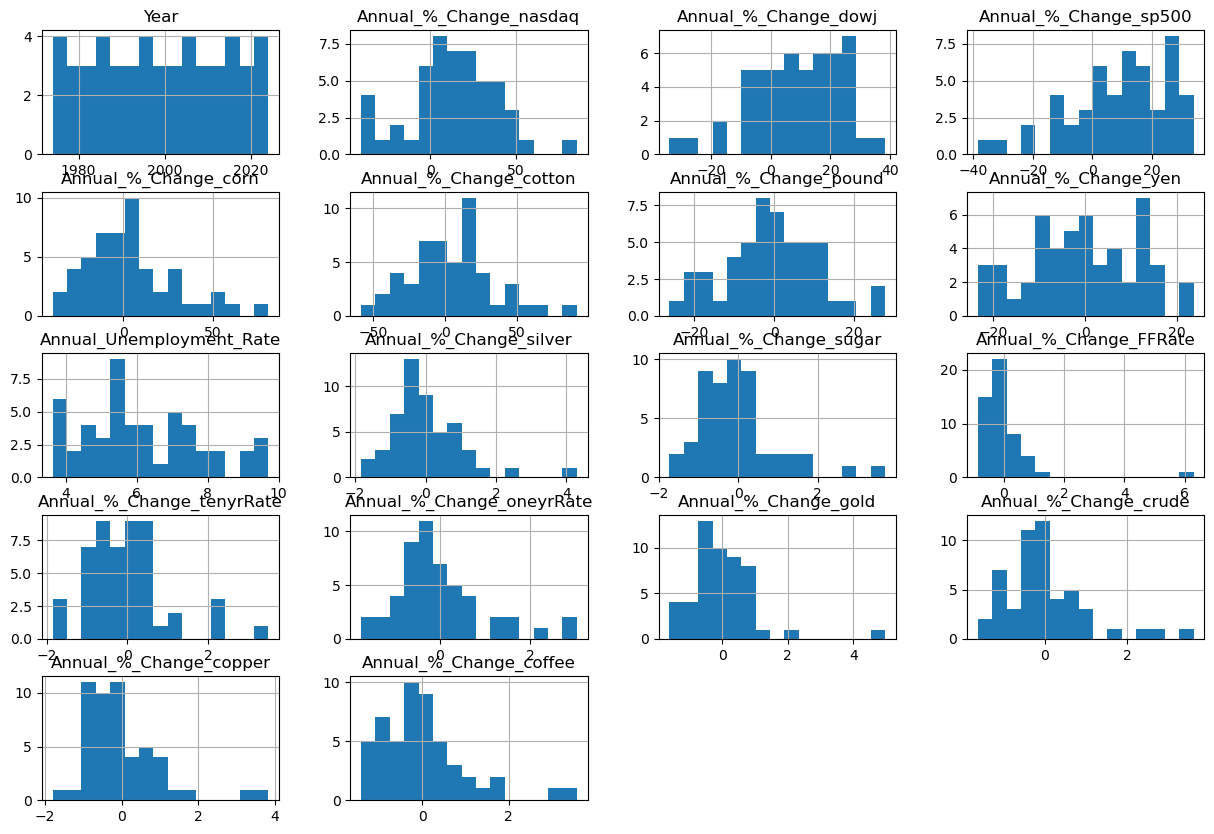

In [12]:
# Histograms
final_df.hist(bins=15, figsize=(15, 10))
plt.show()

In [13]:
final_df.sort_values('Year', inplace=True)

# Create the binary indicator variable
final_df['Unemployment_Rate_Increased'] = (final_df['Annual_Unemployment_Rate'] > final_df['Annual_Unemployment_Rate'].shift(1)).astype(int)

# Display the new DataFrame to verify the new column
print(final_df[['Year', 'Annual_Unemployment_Rate', 'Unemployment_Rate_Increased']].head(10))

      Year  Annual_Unemployment_Rate  Unemployment_Rate_Increased
50  1974.0                  5.641667                            0
49  1975.0                  8.475000                            1
48  1976.0                  7.700000                            0
47  1977.0                  7.050000                            0
46  1978.0                  6.066667                            0
45  1979.0                  5.850000                            0
44  1980.0                  7.175000                            1
43  1981.0                  7.616667                            1
42  1982.0                  9.708333                            1
41  1983.0                  9.600000                            0


In [14]:
final_df.sort_values('Year', ascending=False, inplace=True)

final_df.head()

,Year,Annual_%_Change_nasdaq,Annual_%_Change_dowj,Annual_%_Change_sp500,Annual_%_Change_corn,Annual_%_Change_cotton,Annual_%_Change_pound,Annual_%_Change_yen,Annual_Unemployment_Rate,Annual_%_Change_silver,Annual_%_Change_sugar,Annual_%_Change_FFRate,Annual_%_Change_tenyrRate,Annual_%_Change_oneyrRate,Annual_%_Change_gold,Annual_%_Change_crude,Annual_%_Change_copper,Annual_%_Change_coffee,Unemployment_Rate_Increased
0,2024.0,9.05,5.55,9.89,-6.53,13.58,-0.51,6.85,3.800000,-0.092688,-0.048746,-0.223298,0.262182,-0.145917,-0.144743,0.056138,-0.134274,-0.345731,1
1,2023.0,43.42,13.70,24.23,-30.62,-2.41,5.22,7.56,3.625000,-0.229543,-0.148293,-0.070694,-0.082794,-0.199847,0.188286,-0.582778,-0.166927,0.208869,0
2,2022.0,-33.10,-8.78,-19.44,14.37,-26.29,-10.52,13.91,3.633333,-0.124077,-0.059586,6.297961,3.488887,3.026747,-0.340666,-0.128344,-0.646130,-0.838549,0
3,2021.0,21.39,18.73,26.89,22.57,44.14,-1.23,11.49,5.341667,-0.569481,0.287502,-0.370152,2.094849,3.026747,-0.471016,1.052936,0.566733,1.624098,0
4,2020.0,43.64,7.25,16.26,24.82,13.14,3.21,-5.00,8.091667,1.282133,0.144376,-0.845809,-1.852644,-1.742681,0.639346,-0.807901,0.536434,-0.237071,1


In [15]:
final_df['Unemployment_Rate_Increased'].value_counts()

Unemployment_Rate_Increased
0    35
1    16
Name: count, dtype: int64

In [27]:
final_df.sort_values('Year', ascending=True, inplace=True)

# Calculate the year-over-year percentage change
final_df['Unemployment_Rate_Percent_Change'] = final_df['Annual_Unemployment_Rate'].pct_change() * 100

# Create the binary indicator variable based on the 1.5% change threshold
final_df['Unemployment_Rate_Change_Indicator'] = (final_df['Unemployment_Rate_Percent_Change'].abs() > 10).astype(int)

# Display the DataFrame to verify the new column
print(final_df[['Year', 'Annual_Unemployment_Rate', 'Unemployment_Rate_Percent_Change', 'Unemployment_Rate_Change_Indicator']].head(10))

      Year  Annual_Unemployment_Rate  Unemployment_Rate_Percent_Change  \
50  1974.0                  5.641667                               NaN   
49  1975.0                  8.475000                         50.221566   
48  1976.0                  7.700000                         -9.144543   
47  1977.0                  7.050000                         -8.441558   
46  1978.0                  6.066667                        -13.947991   
45  1979.0                  5.850000                         -3.571429   
44  1980.0                  7.175000                         22.649573   
43  1981.0                  7.616667                          6.155633   
42  1982.0                  9.708333                         27.461707   
41  1983.0                  9.600000                         -1.115880   

    Unemployment_Rate_Change_Indicator  
50                                   0  
49                                   1  
48                                   0  
47                   

In [28]:
final_df.sort_values('Year', ascending=False, inplace=True)

final_df.head(10)

,Year,Annual_%_Change_nasdaq,Annual_%_Change_dowj,Annual_%_Change_sp500,Annual_%_Change_corn,Annual_%_Change_cotton,Annual_%_Change_pound,Annual_%_Change_yen,Annual_Unemployment_Rate,Annual_%_Change_silver,...,Annual_%_Change_FFRate,Annual_%_Change_tenyrRate,Annual_%_Change_oneyrRate,Annual_%_Change_gold,Annual_%_Change_crude,Annual_%_Change_copper,Annual_%_Change_coffee,Unemployment_Rate_Increased,Unemployment_Rate_Percent_Change,Unemployment_Rate_Change_Indicator
0,2024.0,9.05,5.55,9.89,-6.53,13.58,-0.51,6.85,3.800000,-0.092688,...,-0.223298,0.262182,-0.145917,-0.144743,0.056138,-0.134274,-0.345731,1,4.827586,0
1,2023.0,43.42,13.70,24.23,-30.62,-2.41,5.22,7.56,3.625000,-0.229543,...,-0.070694,-0.082794,-0.199847,0.188286,-0.582778,-0.166927,0.208869,0,-0.229358,0
2,2022.0,-33.10,-8.78,-19.44,14.37,-26.29,-10.52,13.91,3.633333,-0.124077,...,6.297961,3.488887,3.026747,-0.340666,-0.128344,-0.646130,-0.838549,0,-31.981279,1
3,2021.0,21.39,18.73,26.89,22.57,44.14,-1.23,11.49,5.341667,-0.569481,...,-0.370152,2.094849,3.026747,-0.471016,1.052936,0.566733,1.624098,0,-33.985582,1
4,2020.0,43.64,7.25,16.26,24.82,13.14,3.21,-5.00,8.091667,1.282133,...,-0.845809,-1.852644,-1.742681,0.639346,-0.807901,0.536434,-0.237071,1,120.181406,1
5,2019.0,35.23,22.34,28.88,3.40,-4.36,4.04,-0.89,3.675000,0.275186,...,-0.457392,-1.065205,-0.862756,0.416797,0.546779,-0.036904,0.447104,0,-5.567452,0
6,2018.0,-3.88,-5.63,-6.24,6.91,-8.18,-5.67,-2.69,3.891667,-0.501996,...,0.308404,0.323283,0.622251,-0.377227,-0.913812,-0.816749,-0.673876,0,-10.707457,1
7,2017.0,28.24,25.08,19.42,-0.36,11.30,9.51,-3.65,4.358333,0.016544,...,0.714005,-0.137373,1.625143,0.168019,0.005153,0.708523,-0.400542,0,-10.598291,1
8,2016.0,7.50,13.42,9.54,-1.88,11.65,-16.05,-2.75,4.875000,0.290880,...,0.933295,0.180830,0.180908,0.011439,0.807124,0.288742,-0.013740,0,-7.582938,0
9,2015.0,5.73,-2.23,-0.73,-9.63,4.99,-5.77,0.35,5.275000,-0.633514,...,1.318804,0.075449,2.378529,-0.792123,-1.052482,-0.945302,-0.785902,0,-14.343708,1


In [29]:
final_df['Unemployment_Rate_Change_Indicator'].value_counts()

Unemployment_Rate_Change_Indicator
0    31
1    20
Name: count, dtype: int64

In [30]:
final_df.tail()

,Year,Annual_%_Change_nasdaq,Annual_%_Change_dowj,Annual_%_Change_sp500,Annual_%_Change_corn,Annual_%_Change_cotton,Annual_%_Change_pound,Annual_%_Change_yen,Annual_Unemployment_Rate,Annual_%_Change_silver,...,Annual_%_Change_FFRate,Annual_%_Change_tenyrRate,Annual_%_Change_oneyrRate,Annual_%_Change_gold,Annual_%_Change_crude,Annual_%_Change_copper,Annual_%_Change_coffee,Unemployment_Rate_Increased,Unemployment_Rate_Percent_Change,Unemployment_Rate_Change_Indicator
46,1978.0,12.31,-3.15,1.06,3.58,25.85,6.25,-19.03,6.066667,0.623913,...,0.212903,0.521687,0.614942,1.082060,-0.301990,0.296979,-0.950575,0,-13.947991,1
47,1977.0,7.33,-17.27,-11.50,-12.77,-28.60,12.94,-18.12,7.050000,0.080891,...,0.150711,0.406009,0.488078,0.585696,-0.133763,-0.357844,-0.557283,0,-8.441558,0
48,1976.0,26.10,17.86,19.15,-1.91,23.54,-15.84,-3.96,7.700000,-0.071658,...,-0.371011,-0.502945,-0.563220,-0.492874,0.302690,0.197844,3.570128,0,-9.144543,0
49,1975.0,29.76,38.32,31.55,-23.48,65.18,-14.04,1.38,8.475000,-0.410655,...,0.032871,0.084030,-0.483463,-1.332997,-0.301990,-0.123390,0.903863,1,50.221566,1
50,1974.0,-35.11,-27.57,-29.72,27.16,-58.48,1.29,7.40,5.641667,0.958202,...,-0.624008,0.166070,-0.209431,2.332708,3.612542,-1.354198,-0.487567,0,NaN,0


In [31]:
final_df.to_csv('final_economic_data.csv', index=False)